# Solucion de la tarea 3
## Módulo 4 - Big Data
## Estudidante: Yoksan Varela Cambronero

In [1]:
# Librerias generales
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Informacion del set de datos, carga y explicacion de los atributos

En esta tarea se plantea una solucion con aprendizaje automatico con la cual se plantea predecir si un animal de un refugio va a ser adoptado o no.

El set de datos a utilizar se llama pet_adoption_data.csv del post *Predict Pet Adoption Status Dataset* (URL: https://www.kaggle.com/datasets/rabieelkharoua/predict-pet-adoption-status-dataset). A continuacion de procede a cargar el CSV en un dataframe explicar las columnas del mismo.

In [2]:
# Cargar el conjunto de datos completo. Este paso no realiza ningún ajuste; simplemente lectura
import findspark
findspark.init('/usr/lib/python3.7/site-packages/pyspark')

from pyspark.sql.types import (StringType, IntegerType, FloatType, 
                               DecimalType, StructField, StructType, BooleanType)

from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Basic JDBC pipeline") \
    .config("spark.driver.extraClassPath", "postgresql-42.2.14.jar") \
    .config("spark.executor.extraClassPath", "postgresql-42.2.14.jar") \
    .getOrCreate()

df_pets_raw = spark \
    .read \
    .format("csv") \
    .option("path", "./datasets/pet_adoption_data.csv") \
    .option("header", False) \
    .schema(StructType([
                StructField("pet_id", IntegerType()),           # El ID del animal
                StructField("pet_type", StringType()),          # El tipo del animal
                StructField("breed", StringType()),             # La raza del mismo
                StructField("age_months", IntegerType()),       # Edad del animal en meses
                StructField("color", StringType()),             # Color del animal
                StructField("size", StringType()),              # Tamanno del mismo
                StructField("weight_kg", FloatType()),          # Masa del animal en kilogramos
                StructField("vaccinated", StringType()),       # Indicador si el animal ha sido vacunado o no
                StructField("health_condition", StringType()), # Indicador si es saludable o tiene algun problema de salud
                StructField("days_in_shelter", IntegerType()),  # Cantidad de dias que el animal ha estado en el refugio
                StructField("adoption_fee", IntegerType()),     # Cantidad dolares a pagar por el animal
                StructField("previous_owner", StringType()),   # Indicador si el animal tuvo un dueno antes o no
                StructField("adoption_status", StringType())])).load() # Indicador si el animal fue adoptado o no

df_pets_raw.printSchema()
df_pets_raw.show()

ps: unrecognized option: p
BusyBox v1.30.1 (2019-10-26 11:23:07 UTC) multi-call binary.

Usage: ps [-o COL1,COL2=HEADER]

Show list of processes

	-o COL1,COL2=HEADER	Select columns for display
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/07/07 22:41:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/usr/lib/python3.7/site-packages/pyspark/context.py:317: FutureWarning: Python 3.7 support is deprecated in Spark 3.4.
  warnings.warn("Python 3.7 support is deprecated in Spark 3.4.", FutureWarning)


root
 |-- pet_id: integer (nullable = true)
 |-- pet_type: string (nullable = true)
 |-- breed: string (nullable = true)
 |-- age_months: integer (nullable = true)
 |-- color: string (nullable = true)
 |-- size: string (nullable = true)
 |-- weight_kg: float (nullable = true)
 |-- vaccinated: string (nullable = true)
 |-- health_condition: string (nullable = true)
 |-- days_in_shelter: integer (nullable = true)
 |-- adoption_fee: integer (nullable = true)
 |-- previous_owner: string (nullable = true)
 |-- adoption_status: string (nullable = true)

+------+--------+----------------+----------+------+------+---------+----------+----------------+---------------+------------+--------------+---------------+
|pet_id|pet_type|           breed|age_months| color|  size|weight_kg|vaccinated|health_condition|days_in_shelter|adoption_fee|previous_owner|adoption_status|
+------+--------+----------------+----------+------+------+---------+----------+----------------+---------------+------------+----

In [3]:
from pyspark.sql.functions import col, when

# Convirtiendo los atributos binarios a BooleanType
# vaccinated
df_pets_transformed = df_pets_raw.withColumn('vaccinated', when(col('vaccinated') == "1", True).when(col('vaccinated') == "0", False).otherwise(None))
df_pets_transformed = df_pets_raw.withColumn('vaccinated', col('vaccinated').cast(BooleanType()))

# health_condition
df_pets_transformed = df_pets_transformed.withColumn('health_condition', when(col('health_condition') == "1", True).when(col('health_condition') == "0", False).otherwise(None))
df_pets_transformed = df_pets_transformed.withColumn('health_condition', col('health_condition').cast(BooleanType()))

# previous_owner
df_pets_transformed = df_pets_transformed.withColumn('previous_owner', when(col('previous_owner') == "1", True).when(col('previous_owner') == "0", False).otherwise(None))
df_pets_transformed = df_pets_transformed.withColumn('previous_owner', col('previous_owner').cast(BooleanType()))

# adoption_status
df_pets_transformed = df_pets_transformed.withColumn('adoption_status', when(col('adoption_status') == "1", True).when(col('adoption_status') == "0", False).otherwise(None))
df_pets_transformed = df_pets_transformed.withColumn('adoption_status', col('adoption_status').cast(BooleanType()))

df_pets_transformed.printSchema()
df_pets_transformed.show()


root
 |-- pet_id: integer (nullable = true)
 |-- pet_type: string (nullable = true)
 |-- breed: string (nullable = true)
 |-- age_months: integer (nullable = true)
 |-- color: string (nullable = true)
 |-- size: string (nullable = true)
 |-- weight_kg: float (nullable = true)
 |-- vaccinated: boolean (nullable = true)
 |-- health_condition: boolean (nullable = true)
 |-- days_in_shelter: integer (nullable = true)
 |-- adoption_fee: integer (nullable = true)
 |-- previous_owner: boolean (nullable = true)
 |-- adoption_status: boolean (nullable = true)

+------+--------+----------------+----------+------+------+---------+----------+----------------+---------------+------------+--------------+---------------+
|pet_id|pet_type|           breed|age_months| color|  size|weight_kg|vaccinated|health_condition|days_in_shelter|adoption_fee|previous_owner|adoption_status|
+------+--------+----------------+----------+------+------+---------+----------+----------------+---------------+------------+

**La variable predictiva en este ejercicio es adoption_status**, el cual es 1 si el animal fue adoptado o 0 en el caso contrario. Revisando la presencia de valores NaN en el dataset:

In [4]:
from pyspark.sql.functions import col, sum

nan_counts = df_pets_transformed.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_pets_raw.columns])
nan_counts.show()

+------+--------+-----+----------+-----+----+---------+----------+----------------+---------------+------------+--------------+---------------+
|pet_id|pet_type|breed|age_months|color|size|weight_kg|vaccinated|health_condition|days_in_shelter|adoption_fee|previous_owner|adoption_status|
+------+--------+-----+----------+-----+----+---------+----------+----------------+---------------+------------+--------------+---------------+
|     0|       0|    0|         0|    0|   0|        0|         0|               0|              0|           0|             0|              0|
+------+--------+-----+----------+-----+----+---------+----------+----------------+---------------+------------+--------------+---------------+



Se concluye que no hay NaN en el dataset. Se descartan las siguientes columnas:
- **pet_id:** Al ser un indicador unico del animal, no aporta ningun valor al estudio.
- **color:** El color es una variable completamente subjetiva por parte de las personas, asi que podria introducir ruido al estudio.

In [5]:
df_pets_clean = df_pets_transformed.drop('pet_id','color')
df_pets_clean.printSchema()
df_pets_clean.show()

root
 |-- pet_type: string (nullable = true)
 |-- breed: string (nullable = true)
 |-- age_months: integer (nullable = true)
 |-- size: string (nullable = true)
 |-- weight_kg: float (nullable = true)
 |-- vaccinated: boolean (nullable = true)
 |-- health_condition: boolean (nullable = true)
 |-- days_in_shelter: integer (nullable = true)
 |-- adoption_fee: integer (nullable = true)
 |-- previous_owner: boolean (nullable = true)
 |-- adoption_status: boolean (nullable = true)

+--------+----------------+----------+------+---------+----------+----------------+---------------+------------+--------------+---------------+
|pet_type|           breed|age_months|  size|weight_kg|vaccinated|health_condition|days_in_shelter|adoption_fee|previous_owner|adoption_status|
+--------+----------------+----------+------+---------+----------+----------------+---------------+------------+--------------+---------------+
|    Bird|        Parakeet|       131| Large|5.0397677|      true|           false|   

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


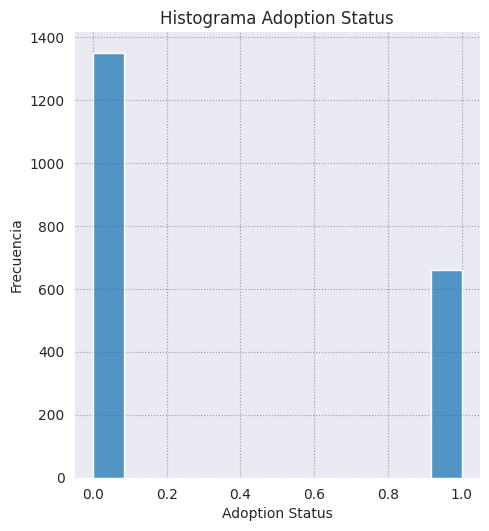

In [6]:
# Analizando el balanceo en el objetivo predictivo
# Estilo de Seaborn
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# Hacer collect de la variable predictiva
df_adopt_status = df_pets_clean.select('adoption_status').rdd.flatMap(lambda x: x).collect()

sns.displot(data=df_adopt_status, kde=False)
plt.xlabel('Adoption Status')
plt.ylabel('Frecuencia')
plt.title('Histograma Adoption Status')
plt.show()


In [7]:
# Solucionando el problema de balanceo con un sub-sampleo de las mascotas adoptadas
# Haciendo una cuenta de los valores de adoption_status
class_counts = df_pets_clean.groupBy('adoption_status').count()
class_counts.show()

+---------------+-----+
|adoption_status|count|
+---------------+-----+
|           true|  659|
|          false| 1348|
+---------------+-----+



Hay un problema de balance, en donde hay mas del doble de animales NO adoptados contra los adoptados. Se procede a hacer un balance con un sub-sampleo de los animales adoptados:

In [8]:
# Separando los dos valores
minority_class_df = df_pets_clean.filter(col('adoption_status') == True)
majority_class_df = df_pets_clean.filter(col('adoption_status') == False)

# Calculando la cantidad de subsampleo necesario para que haya balance
min_count = class_counts.agg({"count": "min"}).collect()[0][0]
fraction = min_count / majority_class_df.count()

# Creando un dataframe con el sub-sampleo
undersampled_majority_class_df = majority_class_df.sample(withReplacement=False, fraction=fraction)

# Ahora se combinan los dataframe para generar uno ya balanceado
df_pets_balanced = undersampled_majority_class_df.union(minority_class_df)

df_pets_balanced.groupBy('adoption_status').count().show()

+---------------+-----+
|adoption_status|count|
+---------------+-----+
|          false|  667|
|           true|  659|
+---------------+-----+



<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


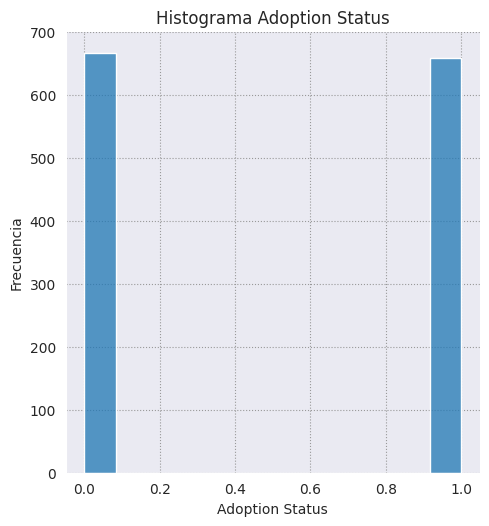

In [9]:
# Se comprueba el resultados final de forma visual
df_adopt_status_balanced = df_pets_balanced.select('adoption_status').rdd.flatMap(lambda x: x).collect()

sns.displot(data=df_adopt_status_balanced, kde=False)
plt.xlabel('Adoption Status')
plt.ylabel('Frecuencia')
plt.title('Histograma Adoption Status')
plt.show()

Ya se cuenta con un set de datos balanceado, a costas de haber perdido los datos. Ahora se procede a analizar los otros atributos con respecto al objectivo predictivo:

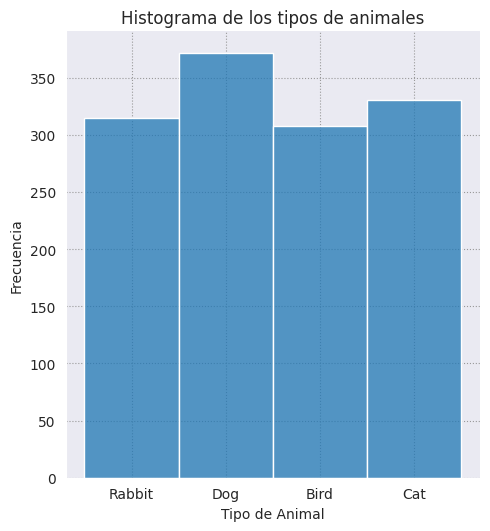

In [10]:
# Tipos de mascotas
petType_data = df_pets_balanced.select('pet_type').rdd.flatMap(lambda x: x).collect()

sns.displot(data=petType_data, kde= False)
plt.xlabel('Tipo de Animal')
plt.ylabel('Frecuencia')
plt.title('Histograma de los tipos de animales')
plt.show()

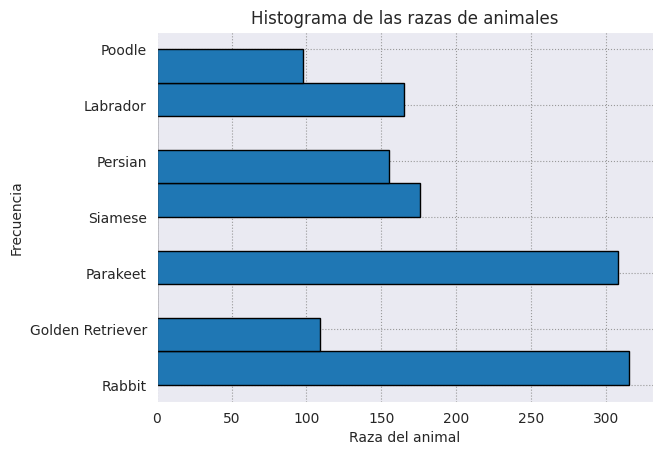

In [17]:
# Razas de los animales
breed_data = df_pets_balanced.select('breed').rdd.flatMap(lambda x: x).collect()

plt.hist(breed_data, orientation='horizontal', edgecolor='black')
plt.xlabel('Raza del animal')
plt.ylabel('Frecuencia')
plt.title('Histograma de las razas de animales')
plt.show()

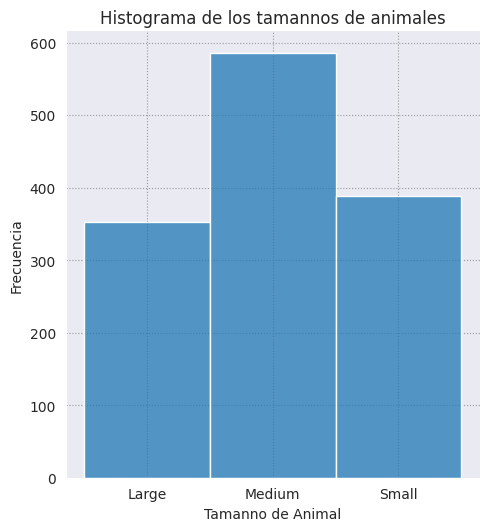

In [18]:
# Tamanno de los animales
size_data = df_pets_balanced.select('size').rdd.flatMap(lambda x: x).collect()

sns.displot(data=size_data, kde= False)
plt.xlabel('Tamanno de Animal')
plt.ylabel('Frecuencia')
plt.title('Histograma de los tamannos de animales')
plt.show()

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


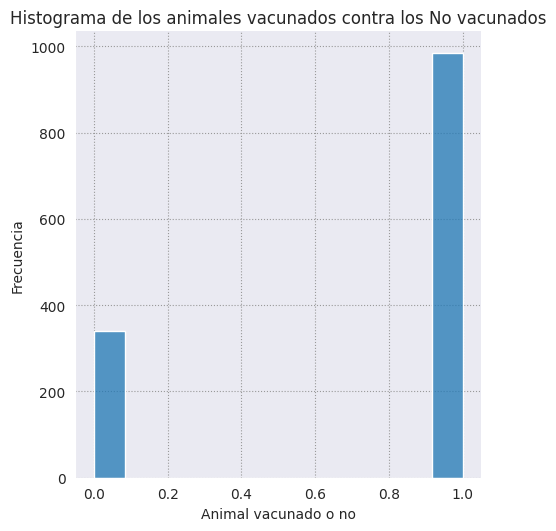

In [21]:
# Vacunados o no?
vaccinated_data = df_pets_balanced.select('vaccinated').rdd.flatMap(lambda x: x).collect()

sns.displot(data=vaccinated_data, kde= False)
plt.xlabel('Animal vacunado o no')
plt.ylabel('Frecuencia')
plt.title('Histograma de los animales vacunados contra los No vacunados')
plt.show()

In [20]:
# Algunas otras metricas estadisticas descriptivas
df_pets_balanced.describe(['weight_kg', 'days_in_shelter', 'adoption_fee']).show()

+-------+-----------------+------------------+------------------+
|summary|        weight_kg|   days_in_shelter|      adoption_fee|
+-------+-----------------+------------------+------------------+
|  count|             1326|              1326|              1326|
|   mean|15.67917393100747| 43.95625942684766|250.89743589743588|
| stddev|8.370690095628367|25.731640651177422| 142.1119942391491|
|    min|        1.0464344|                 1|                 0|
|    max|        29.995628|                89|               499|
+-------+-----------------+------------------+------------------+



Con este analsis, se observa que el set de datos esta bastante saludable. Hay un problema de balance entre los animales vacunados contra los no vacunados, pero el resto de variables categorias se muestran mejor balanceadas, por lo tanto, no se van a eliminar mas datos.

Ahora se procede a almacenar esto en la base de datos:

In [22]:
# Almacenar el conjunto de datos limpio en la base de datos
df_pets_balanced \
    .write \
    .format("jdbc") \
    .mode('overwrite') \
    .option("url", "jdbc:postgresql://host.docker.internal:5433/postgres") \
    .option("user", "postgres") \
    .option("password", "testPassword") \
    .option("dbtable", "tarea3_raw") \
    .save()